In [ ]:
import pandas as pd
import numpy as np
# Load the Titanic dataset
data = pd.read_csv("/content/drive/MyDrive/Datasets/diabetes.csv")
# Drop all categorical columns except ’Survived’
categorical_columns = data.select_dtypes(include=['object']).columns
data = data.drop(columns=[col for col in categorical_columns if col != 'Survived'])
# Check for missing values
missing_info = data.isnull().sum() / len(data) * 100
# Handle missing values
for column in data.columns:
  if missing_info[column] > 10: # If more than 10% missing
    data[column].fillna(data[column].mean(), inplace=True)
else: # If less than 10% missing
  data.dropna(subset=[column], inplace=True)
# Display cleaned data
print("Data after processing:\n", data.head())
print("\nMissing values after processing:\n", data.isnull().sum())

Data after processing:
    Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  

Missing values after processing:
 Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outc

In [ ]:
# Separate the feature matrix (X) and target variable (y)
X = data.drop('Outcome', axis=1).values
y = data['Outcome'].values

# Perform a train-test split (70% train, 30% test)
np.random.seed(42)
indices = np.arange(len(X))
np.random.shuffle(indices)
split_point = int(0.7 * len(X))

X_train = X[indices[:split_point]]
X_test = X[indices[split_point:]]
y_train = y[indices[:split_point]]
y_test = y[indices[split_point:]]

In [ ]:
# Function to calculate Euclidean distance
def euclidean_distance(point1, point2):
    return np.sqrt(np.sum((point1 - point2) ** 2))

# Function to predict the class for a single query
def predict_single(X_train, y_train, query_point, k):
    # Calculate distances between the query point and all training points
    distances = [euclidean_distance(query_point, train_point) for train_point in X_train]

    # Get the indices of the k nearest neighbors
    k_indices = np.argsort(distances)[:k]

    # Get the labels of the k nearest neighbors
    k_nearest_labels = y_train[k_indices]

    # Return the most common label
    unique_labels, counts = np.unique(k_nearest_labels, return_counts=True)
    return unique_labels[np.argmax(counts)]

# Function to predict classes for all test samples
def predict(X_train, y_train, X_test, k):
    predictions = [predict_single(X_train, y_train, test_point, k) for test_point in X_test]
    return np.array(predictions)

# Evaluate the performance using accuracy
def accuracy(y_true, y_pred):
    return np.sum(y_true == y_pred) / len(y_true)

# Test the KNN implementation with k=3
k = 3
y_pred = predict(X_train, y_train, X_test, k)
print("Accuracy:", accuracy(y_test, y_pred))

Accuracy: 0.7012987012987013


In [ ]:
# Function to scale the feature matrix X
def scale_data(X):
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    return (X - mean) / std

# Scale the feature matrix X
X_scaled = scale_data(X)

# Perform a train-test split on the scaled data
np.random.seed(42)
indices = np.arange(len(X_scaled))
np.random.shuffle(indices)
split_point = int(0.7 * len(X_scaled))

X_train_scaled = X_scaled[indices[:split_point]]
X_test_scaled = X_scaled[indices[split_point:]]
y_train = y[indices[:split_point]]
y_test = y[indices[split_point:]]

# Test the KNN implementation with k=3 on scaled data
k = 3
y_pred_scaled = predict(X_train_scaled, y_train, X_test_scaled, k)
print("Accuracy on Scaled Data:", accuracy(y_test, y_pred_scaled))

Accuracy on Scaled Data: 0.696969696969697


In [ ]:
# Compare the accuracy of the original and scaled datasets
print("Accuracy on Original Data:", accuracy(y_test, y_pred))
print("Accuracy on Scaled Data:", accuracy(y_test, y_pred_scaled))

# Discussion:
# Scaling the data generally improves the performance of KNN because KNN relies on distance metrics.
# Features with larger scales can dominate the distance calculation, leading to biased results.
# Scaling ensures that all features contribute equally to the distance calculation.

Accuracy on Original Data: 0.7012987012987013
Accuracy on Scaled Data: 0.696969696969697


In [ ]:
import time

# Function to test KNN for a range of k values
def test_knn_for_k(X_train, y_train, X_test, y_test, k_values):
    accuracies = []
    times = []

    for k in k_values:
        start_time = time.time()
        y_pred = predict(X_train, y_train, X_test, k)
        acc = accuracy(y_test, y_pred)
        accuracies.append(acc)
        times.append(time.time() - start_time)

    return accuracies, times

# Test for k = 1 to 15
k_values = range(1, 16)
accuracies_original, times_original = test_knn_for_k(X_train, y_train, X_test, y_test, k_values)
accuracies_scaled, times_scaled = test_knn_for_k(X_train_scaled, y_train, X_test_scaled, y_test, k_values)

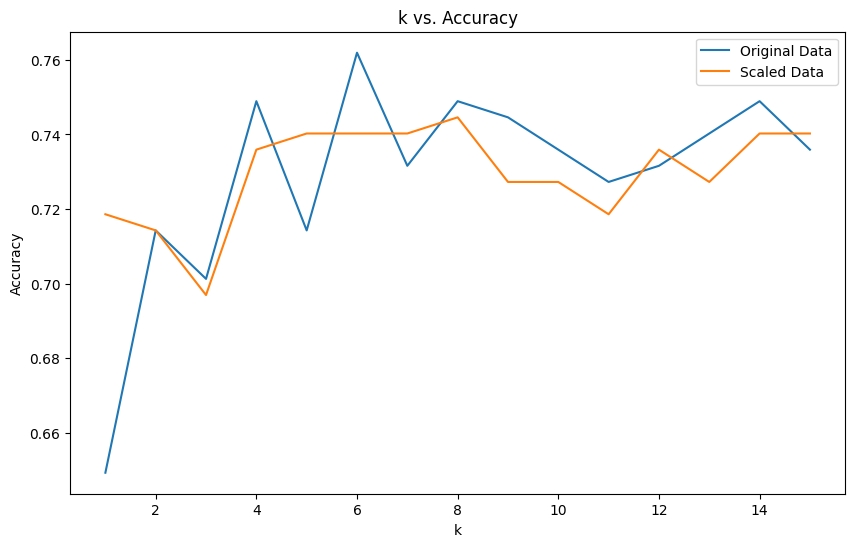

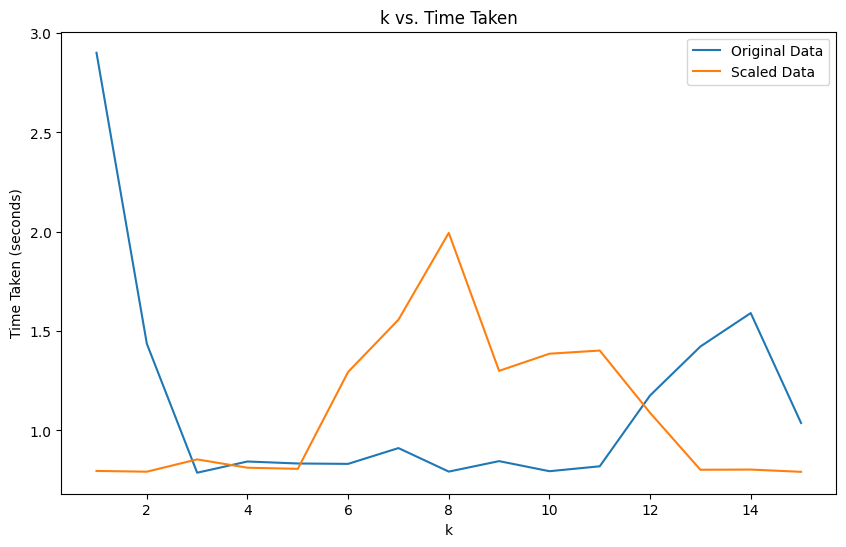

In [ ]:
import matplotlib.pyplot as plt

# Plot k vs. Accuracy
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies_original, label='Original Data')
plt.plot(k_values, accuracies_scaled, label='Scaled Data')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('k vs. Accuracy')
plt.legend()
plt.show()

# Plot k vs. Time Taken
plt.figure(figsize=(10, 6))
plt.plot(k_values, times_original, label='Original Data')
plt.plot(k_values, times_scaled, label='Scaled Data')
plt.xlabel('k')
plt.ylabel('Time Taken (seconds)')
plt.title('k vs. Time Taken')
plt.legend()
plt.show()